### 5-3．딥러닝을 위한 데이터의 준비
#### 데이터 세트의 작성

In [1]:
# OpenCV의 인스톨
!pip install opencv-python

In [1]:
import os
import cv2
import numpy as np

# 이미지 폴더의 지정
dirs = ['ants', 'bees']

# 이미지의 픽셀값과 레이블을 보존하기 위한 리스트를 생성
pixels = [] # 설명변수
labels = [] # 목적변수

#  폴더의 파일을 하나씩 읽어들여 처리한 후에 리스트에 보존
for i, d in enumerate(dirs):
    # 파일명을 취득
    files = os.listdir('./data/' + d)
    
    for f in files:
        # 이미지를 그레이 스케일로 리드
        img = cv2.imread('./data/' + d + '/' + f, 0)
        # 이미지를 리사이즈
        img = cv2.resize(img, (128, 128))
        # 픽셀값을 보존
        img = np.array(img).flatten().tolist()
        pixels.append(img)
        
        # 이미지의 레이블을 리스트에 보존 
        labels.append(i)

In [2]:
# Numpy배열로 변화하고 2차원 배열로 리사이즈
pixels = np.array(pixels)/255
pixels = pixels.reshape([-1, 128, 128, 1])
labels = np.array(labels)

# 첫번째 이미지의 데이터 사이즈를 확인
print(pixels[0].shape)
# 첫번째 이미지의 레이블을 확인
print(labels[0])

(128, 128, 1)
0


In [3]:
from sklearn import model_selection

# 데이터 세트를 훈련데이터와 테스트 데이터로 분할
trainX, testX, trainY, testY = model_selection.train_test_split(pixels, labels, test_size=0.2)

# 훈련데이터와 테스트 데이터의 사이즈 확인
print(len(trainY))
print(len(testY))

317
80


##### === 모델의 작성은 여기서부터 ======================

In [5]:
!pip install keras

In [16]:
# keras의 로드
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
# 첫번째 컨벌루션층과 풀링층
model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
# 두번째 컨벌루션층과 풀링층
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
# 전 결합층
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# 출력층
model.add(Dense(1, activation='sigmoid'))

# 작성한 네트워크의 확인
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 124, 124, 16)      416       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 62, 62, 16)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 58, 58, 32)        12832     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 29, 29, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 29, 29, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 26912)             0         
__________

In [17]:
# 학습조건의 설정　오차함수 = 2값의 교차 엔트로피, 최적화 방법 = SGD법, 측정방법 = 모델의 정밀도
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 학습의 실행
hist = model.fit(trainX, trainY, batch_size=64, verbose=1, 
                 epochs=20, validation_data=(testX, testY))

Train on 317 samples, validate on 80 samples
Epoch 1/20
317/317 [==============================] - 6s 20ms/step - loss: 0.7026 - acc: 0.4890 - val_loss: 0.6901 - val_acc: 0.5625
Epoch 2/20
317/317 [==============================] - 6s 19ms/step - loss: 0.6956 - acc: 0.5489 - val_loss: 0.6918 - val_acc: 0.5125
Epoch 3/20
317/317 [==============================] - 6s 19ms/step - loss: 0.6954 - acc: 0.5552 - val_loss: 0.6874 - val_acc: 0.5625
Epoch 4/20
317/317 [==============================] - 6s 20ms/step - loss: 0.6876 - acc: 0.5584 - val_loss: 0.6846 - val_acc: 0.5500
Epoch 5/20
317/317 [==============================] - 6s 20ms/step - loss: 0.6840 - acc: 0.5710 - val_loss: 0.6850 - val_acc: 0.5625
Epoch 6/20
317/317 [==============================] - 7s 21ms/step - loss: 0.6849 - acc: 0.5237 - val_loss: 0.6831 - val_acc: 0.5000
Epoch 7/20
317/317 [==============================] - 6s 20ms/step - loss: 0.6985 - acc: 0.5300 - val_loss: 0.6802 - val_acc: 0.6875
Epoch 8/20
317/317 [====

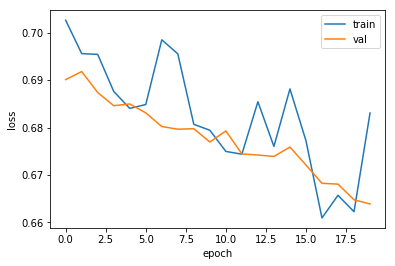

In [18]:
# 훈련데이터와 테스트 데이터의 정밀도의 이력을 플로트
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

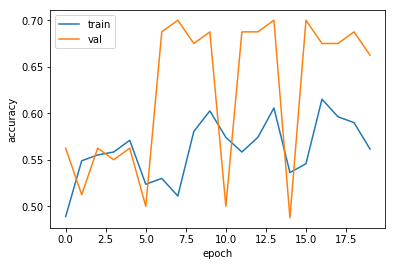

In [19]:
# 訓練データとテストデータの精度の履歴を描画
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

##### === 모델의 작성은 여기까지 ======================

In [2]:
import os
import cv2
import numpy as np

# 이미지 폴더의 지정
dirs = ['ants', 'bees']

# 연습문제7
# 이미지의 픽셀값과 레이블을 보존하기 위한 리스트를 생성
pixels2 = [] # 설명변수
labels2 = [] # 목적변수

# 각 폴더의 파일을 하나씩 읽어들여 처리한 후에 리스트에 보존
for i, d in enumerate(dirs):
    # 파일명을 취득
    files = os.listdir('./data/' + d)
    
    for f in files:
        # 이미지를 그레이 스케일로 리드
        img2 = cv2.imread('./data/' + d + '/' + f)
        # 이미지를 리사이즈
        img2 = cv2.resize(img2, (128, 128))
        # 픽셀값을 정규화
        img2 = img2/255
        pixels2.append(img2)
        
        # 이미지의 레이블을 리스트에 보존
        labels2.append(i)

In [4]:
from sklearn import model_selection

# Numpy배열로 변화하고 2차원 배열로 리사이즈
pixels2 = np.array(pixels2).reshape([-1, 128, 128, 3])
labels2 = np.array(labels2)

# 첫번째 이미지의 데이터 사이즈와 레이블을 확인
print(pixels2[0].shape)
print(labels2[0])

# 데이터 세트를 훈련데이터와 테스트 데이터로 분할
trainX, testX, trainY, testY = model_selection.train_test_split(
    pixels2, labels2, test_size=0.2)

# 훈련데이터와 테스트 데이터의 사이즈 확인
print(len(trainY))
print(len(testY))

(128, 128, 3)
0
317
80


##### === 모델의 작성은 여기서부터 ======================

In [5]:
# keras의 로드
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
# 첫번째 컨벌루션층과 풀링층
model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
# 두번째 컨벌루션층과 풀링층
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
# 전 결합층
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# 출력층
model.add(Dense(1, activation='sigmoid'))

# 작성한 네트워크의 확인
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 124, 124, 16)      1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 58, 58, 32)        12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 29, 29, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 26912)             0         
__________

In [6]:
# 학습조건의 설정　오차함수 = 2값의 교차 엔트로피, 최적화 방법 = 확률적경사하강법, 측정방법 = 모델의 정밀도
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습의 실행 
hist = model.fit(trainX, trainY, batch_size=64, verbose=1, 
                 epochs=20, validation_data=(testX, testY))

Train on 317 samples, validate on 80 samples
Epoch 1/20
317/317 [==============================] - 13s 42ms/step - loss: 5.6794 - acc: 0.4858 - val_loss: 0.6954 - val_acc: 0.5500
Epoch 2/20
317/317 [==============================] - 9s 27ms/step - loss: 0.8104 - acc: 0.5110 - val_loss: 0.6927 - val_acc: 0.4875
Epoch 3/20
317/317 [==============================] - 9s 27ms/step - loss: 0.6918 - acc: 0.5205 - val_loss: 0.6931 - val_acc: 0.4875
Epoch 4/20
317/317 [==============================] - 10s 31ms/step - loss: 0.6909 - acc: 0.5205 - val_loss: 0.6931 - val_acc: 0.4875
Epoch 5/20
317/317 [==============================] - 10s 30ms/step - loss: 0.6909 - acc: 0.5205 - val_loss: 0.6930 - val_acc: 0.4875
Epoch 6/20
317/317 [==============================] - 9s 28ms/step - loss: 0.6894 - acc: 0.5205 - val_loss: 0.6931 - val_acc: 0.5500
Epoch 7/20
317/317 [==============================] - 9s 27ms/step - loss: 0.6808 - acc: 0.5899 - val_loss: 0.6926 - val_acc: 0.5000
Epoch 8/20
317/317 [=

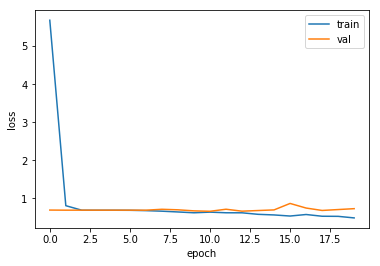

In [9]:
import matplotlib.pyplot as plt

# 훈련데이터와 테스트 데이터의 오차의 이력을 플로트
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

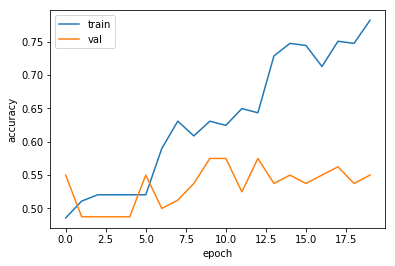

In [10]:
# 훈련데이터와 테스트 데이터의 정밀도의 이력을 플로트
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

##### === 모델의 작성은 여기까지 ======================

#### 이미지 수 늘리기

In [1]:
# 이미지를 그레이 스케일로 리드
img = cv2.imread('./data/ants/swiss-army-ant.jpg', 0)

# 이미지의 반전
x_img = cv2.flip(img, 0) # x축을 기준
y_img = cv2.flip(img, 1) # y축을 기준
xy_img = cv2.flip(img, -1) # xy축을 기준

# 이미지의 출력
cv2.imwrite('x_img.jpg', x_img)
cv2.imwrite('y_img.jpg', y_img)
cv2.imwrite('xy_img.jpg', xy_img)

True

In [2]:
# 이미지의 블러 처리
blur_img = cv2.blur(img, (5,5)) # 平均値
gau_img = cv2.GaussianBlur(img, (5,5), 0) # ガウシアン
med_img = cv2.medianBlur(img, 5) # 中央値
#bilf_img = cv2.bilateralFilter(img, 9, 75, 75) # バイラテラル

# 이미지의 출력
cv2.imwrite('blur_img.jpg', blur_img)
cv2.imwrite('gau_img.jpg', gau_img)
cv2.imwrite('med_img.jpg', med_img)
#cv2.imwrite('bilf_img.jpg', bilf_img)

True

In [4]:
# 감마계수
gamma = 1.5

# lookup테이블의 작성
lut = np.zeros((256,1), dtype = 'uint8')

for i in range(len(lut)):
    lut[i][0] = 255 * pow((float(i)/255), (1.0/gamma))

# 보정해서 이미지를 변환
gamma_img = cv2.LUT(img, lut)

# 이미지의 출력
cv2.imwrite('gamma_img.jpg', gamma_img)

True

In [6]:
# 연습문제8
files = os.listdir('./data/ants/')

# 감마계수
gamma = 0.6

# 감마계수가 1.2에 도달 할 때까지 반복처리
while gamma <= 1.2:
    # lookup테이블의 작성
    lut = np.zeros((256,1), dtype = 'uint8')

    for i in range(len(lut)):
        lut[i][0] = 255 * pow((float(i)/255), (1.0/gamma))

    for f in files:
        # 이미지를 그레이 스케일로 리드
        img = cv2.imread('./data/ants/' + f, 0)
        # 보정해서 이미지를 변환
        gamma_img = cv2.LUT(img, lut)
        # 이미지의 출력
        cv2.imwrite('./data/dummy_ants/gamma' + str(gamma) + '_' + f, gamma_img)
        
    # 감마계수를 0.6씩 증가
    gamma = gamma + 0.6

##### === 보충지식은 여기서부터 ======================

In [12]:
from keras import backend as K

# 첫번째 컨벌루션층의 특징량을 추출
get_output = K.function([model.layers[0].input], [model.layers[0].output])
# 테스트 데이터에 적용
output = get_output([testX, ])[0]

# 데이터 사이즈를 확인
print(len(output)) # 테스트 데이터의 건수
print(len(output[0])) # 세로 사이즈
print(len(output[0][0])) # 가로 사이즈
print(len(output[0][0][0])) # 필터 수

80
124
124
16


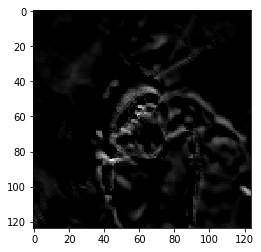

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

filter1 = []

# 첫번째 이미지의, 첫번째 컨벌루션층의 특징량을 플로트
for i in range(0, 1):
    for j in range(0, 124):
        tmp = pd.DataFrame(output[i][j])
        tmp = tmp[0]
        tmp = np.array(tmp).tolist()
        filter1.append(tmp)
        tmp = []

plt.imshow(np.array(filter1), cmap='gray')
plt.show()

##### === 보충지식은 여기까지 ======================